# <a href="https://miptstats.gitlhub.io/courses/ad_fivt.html">Введение в анализ данных</a>
## Домашнее задание 10. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image`;
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.



**Баллы за задание:**

* Задача 1 &mdash; 50 баллов
* Задача 2 &mdash; 40 баллов
* Задача 3 &mdash; 10 баллов

Баллы учитываются в <b><font color="green">факультативной части</font></b> курса и не влияют на оценку по основной части.

In [50]:
# Bot check

# HW_ID: fpmi_ad10
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [51]:
from tqdm import tqdm

import numpy as np
import scipy.stats as sps

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE

sns.set(font_scale=1.2, palette='Set2')
%matplotlib inline

Перед выполнением задания обязательно посмотрите <a href="https://miptstats.github.io/courses/ad_fivt/lecture9.pdf" target="_blank">презентацию</a> и <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html" target="_blank">обучающий ноутбук</a> с занятия по нейронным сетям.

---
### Задача 1.

Рассмотрим двуслойную нейронную сеть, которая принимает на вход $x\in\mathbb{R}$ и возвращает $y\in\mathbb{R}$. Выход первого слоя возвращает $u \in\mathbb{R}^2$. После первого слоя используется функция активации $\sigma(x) = \frac{1}{1 + \exp(-x)}$, после второго слоя функция активации не используется (или используется тождественная). Тем самым нашу нейронную можно представить в виде

$$\widehat{y}(x) = \sum_{h=1}^2 w_{2h}u_h(x) + b_2,$$

$$u_h(x) = \sigma(w_{1h}x + b_{1h}),$$

$$\text{где} \; h \in \{1, 2\}.$$



**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

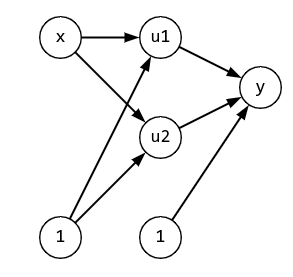
(Надеюсь картинка прикрепилась)
Всего обучающих параметров: 7 (по количеству стрелочек)

**2.** Пусть нам дана обучающая выборка $(X_1, Y_1), ..., (X_n, Y_n)$, где $X_i \in \mathbb{R}$ и $Y_i \in \mathbb{R}$. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $L$ &mdash; функцию ошибки. Положим, что $L$ &mdash; это MSE:
$$\text{MSE} = L(X, Y) = \frac{1}{n}\sum_{i=1}^n \big(Y_i - \widehat{y}(X_i)\big)^2.$$

Наша задача &mdash; найти оптимальные параметры нашей модели для минимизации $L(X, Y)$ на заданном наборе данных. Мы будем решать эту задачу с помощью градиентного спуска. Для этого нам понадобится выписать производные по всем параметрам сети. Конечно, в данном случае довольно просто выписать все производные напрямую. Однако мы воспользуемся следующей хитростью: мы будем считать производные поэтапно, причем начнем с конца вычислительной цепочки и, используя формулу производной сложной функции, последовательно посчитаем все необходимые производные. Этот процесс называется методом **обратного распространения ошибки (backpropagation)**.

**2.1.** Начнем с производной MSE по выходам сети
$$\frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} = -\frac2n (Y_i - \widehat{y}(X_i))$$

**2.2** Возьмем производные выходов сети по параметрам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial w_{2h}} = u_h(X_i)$$

$$\frac{\partial \widehat{y}(X_i)}{\partial b_2} = 1$$

Также выпишем производные выходов сети по входам последнего слоя

$$\frac{\partial \widehat{y}(X_i)}{\partial u_h(X_i)} = w_{2h}$$

Теперь выпишем производные MSE по параметрам и входам последнего слоя. Для этого вспомните правило производной сложной функции из математического анализа. Обратите внимание на то, что нам не нужно прописывать все производные до конца, достаточно заполнить пропуски в записи ниже:

$$\frac{\partial\:\text{MSE}}{\partial w_{2h}} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial w_{2h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_2} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial b_2}$$

$$\frac{\partial\:\text{MSE}}{\partial u_h} = \sum_{i=1}^n \frac{\partial\:\text{MSE}}{\partial \widehat{y}(X_i)} \frac{\partial \widehat{y}(X_i)}{\partial u_h}$$

**2.2.** Теперь будем разбираться с производными по параметрам первого слоя.

Для начала нам пригодится производная функции активации, запишите ее так, чтобы ответе осталась функция от $\sigma(x)$

$$\frac{\partial\:\sigma(x)}{\partial x} = \sigma(x) (1 - {\sigma (x)})$$

Теперь возьмем производные выходов первого слоя по его параметрам

$$\frac{\partial u_h(X_i)}{\partial w_{1h}} = \sigma(w_{1h}x + b_{1h})(1 - {\sigma (w_{1h}x + b_{1h})) x$$

$$\frac{\partial u_h(X_i)}{\partial b_{1h}} = \sigma(w_{1h}x + b_{1h})(1 - {\sigma (w_{1h}x + b_{1h}))$$

Наконец, выпишем производные MSE по параметрам первого слоя. Так же как и раньше достаточно заполнить пропуски в записи ниже

$$\frac{\partial\:\text{MSE}}{\partial w_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{ \partial u_h(X_i)} \frac{\partial  u_h(X_i)}{\partial w_{1h}}$$

$$\frac{\partial\:\text{MSE}}{\partial b_{1h}} = \; \sum_{i=1}^n \frac{\partial\:\text{MSE}}{ \partial u_h(X_i)} \frac{\partial  u_h(X_i)}{\partial b_{1h}}$$

**3.** Пусть обучающая выборка очень большая. Что нужно делать в таком случае? Запишите, как нужно поменять правило обновления параметров.

Вместо того, чтобы обновлять веса после подсчета ошибки для каждого элемента выборки, мы будем считать суммарную ошибку на батче, и усренднять по числу элементов. Так мы в несколько (размер батча) раз сократим сложность вычисления, при этом не сильно потеряв в скорости сходимости.sigmoid(

**Вывод:**

При подсчете ошибки для нейронной сети методом backpropagation можно понять какой из элементов внес какую ошибку. Это позволяет, как эффективно обучать нейронные сети этим методом, так и исследовать их на предмет ошибки.

---
### Задача 2.

Реализуйте класс нейронной сети из задачи 1 в стиле scikit-learn, например, см. шаблон класса задачи 4 из <a href="https://miptstats.github.io/courses/ad_fivt/task6.html#Задача-4." target="_blank">задания 6</a>. Предусмотрите возможность обучения по случайным батчам. При реализации можно использовать только библиотеку `numpy`.

Функция для генерации батчей

In [52]:
def generate_batches(X, y, batch_size):
    assert len(X) == len(y)
    np.random.seed(42)
    X = np.array(X)
    y = np.array(y)
    perm = np.random.permutation(len(X))

    for batch_start in range(0, len(X) - batch_size + 1, batch_size):
        index = perm[batch_start: batch_start + batch_size]
        yield (X[index], y[index])

Сигмоида и ее производная

In [53]:
def sigmoid(x):
    return 1.0 / (1.0 + np.exp(-x))

def sigmoid_der(x):
    return sigmoid(x) * (1 - sigmoid(x))

Класс моей нейронной сети

In [54]:
class NN_two_layer:
    def __init__(self, loss_f=MSE):
        self.weights_1 = np.random.rand(2, 2)
        self.weights_2 = np.random.rand(3, 1)
        self.loss_f = loss_f

    def fit(self, X_train, Y_train, epochs=10, lr=0.1, batch_size=100):
        for _ in tqdm(range(epochs)):
            for X_batch, y_batch in generate_batches(X_train, Y_train, batch_size):
                bias = np.ones((X_batch.shape[0], 1))
                X_batch = np.hstack([X_batch, bias])

                self.backward(X_batch, y_batch, lr=lr)
        return self

    def __loss(self, y_true, y_pred):
        return MSE(y_true, y_pred)

    def forward(self, X):
        U = sigmoid(X @ self.weights_1)

        bias = np.ones((U.shape[0], 1))
        U = np.hstack([U, bias])
        Y = U @ self.weights_2
        return U, Y

    def backward(self, X, Y, lr=1):
        U, Y_pred = self.forward(X)
        y_error = np.mean(2 * (Y_pred - Y) / Y.shape[0] * lr)

        weights_2_error = (y_error * U).mean(axis=0).reshape(3, 1)
        self.weights_2 -= lr * weights_2_error

        u_error = (y_error * self.weights_2)[:2]
        sigmoid_error = sigmoid_der(X @ self.weights_1).mean(axis=0)
        weights_1_error = (u_error * sigmoid_error * X.mean(axis=0)).reshape((2, 2)).T
        self.weights_1 -= lr * weights_1_error

    def predict(self, X, apply_bias=True):
        if apply_bias:
            bias = np.ones((X.shape[0], 1))
            X = np.hstack([X, bias])
        U, Y_pred = self.forward(X)
        return Y_pred

Сгенерируем данные. Возьмите какую-либо нелинейную функцию $y(x)$.

Генерация данных

In [55]:
f = lambda x : np.sin(x) + np.cos(x)

sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
# X = (sps.uniform.rvs(size=(sample_size, 1)) - 0.5) * 10
y = f(X)
assert y.shape == X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Обучите нейронную сеть на этих данных, а также простую линейную регрессию. Для линейной регрессии стоит взять реализацию из `sklearn`.

In [57]:
model_nn = NN_two_layer()
model_nn.fit(X_train, y_train, epochs=15, lr=2, batch_size=100);

100%|██████████| 15/15 [00:11<00:00,  1.32it/s]


In [58]:
model_lr = LinearRegression()
model_lr.fit(X_train, y_train);

Визуализируйте предсказания данных моделей и посчитайте MSE на тестовой части данных.

Предсказания

In [59]:
y_nn_pred = model_nn.predict(X_test)
y_lr_pred = model_lr.predict(X_test)

y_nn_train = model_nn.predict(X_train)
y_lr_train = model_lr.predict(X_train)

Визуализация тренировочных данных

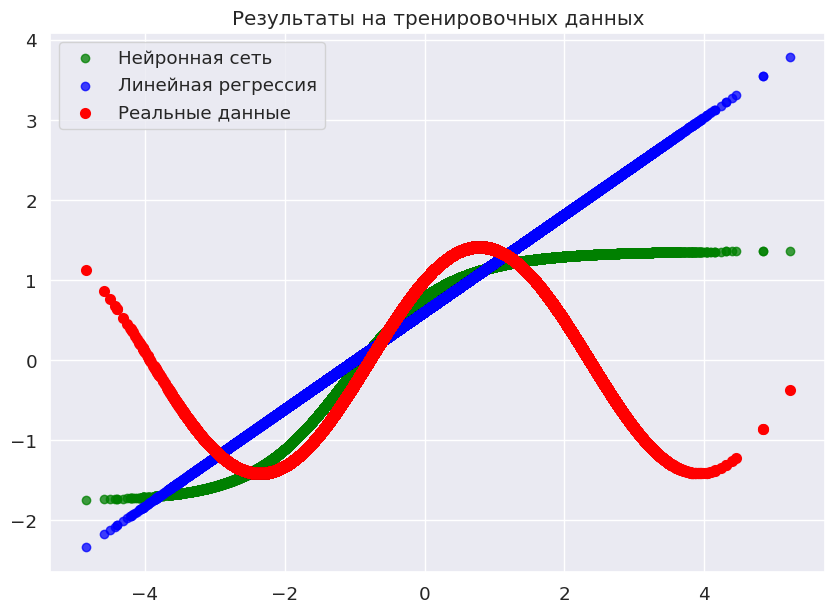

In [60]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_nn_train, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_train, y_lr_train,  color='blue', alpha=0.75, label="Линейная регрессия")
plt.scatter(X_train, y_train, color='red', linewidth=2, label="Реальные данные")
plt.title('Результаты на тренировочных данных')
plt.legend()
plt.show()

Визуализация тестовых данных

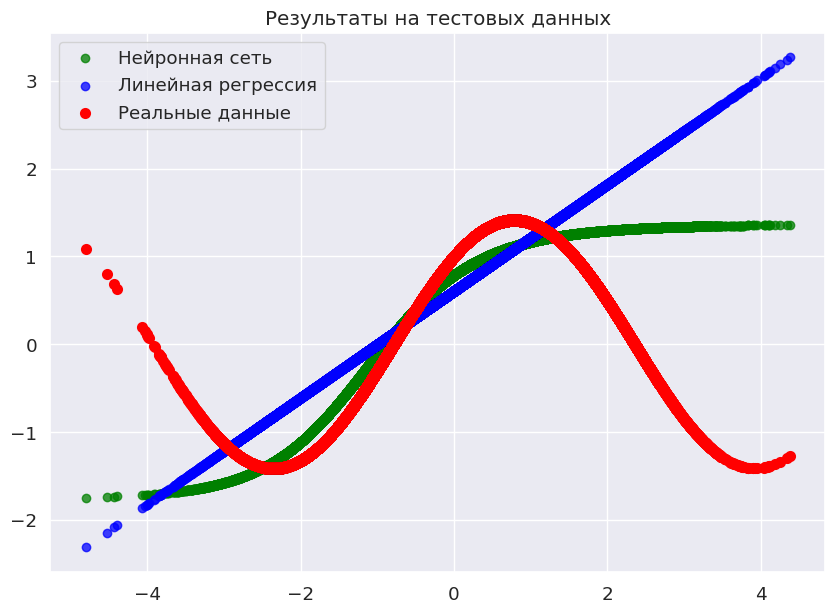

In [61]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_nn_pred, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_test, y_lr_pred,  color='blue', alpha=0.75, label="Линейная регрессия")
plt.scatter(X_test, y_test, color='red', linewidth=2, label="Реальные данные")
plt.title('Результаты на тестовых данных')
plt.legend()
plt.show()

Посчитаем MSE на тестовой выборке

In [62]:
print("nn test mse", MSE(y_train, y_nn_train))
print("lr test mse", MSE(y_train, y_lr_train))

nn test mse 0.09900266052936137
lr test mse 0.2639270852534577


In [63]:
print("nn test mse", MSE(y_test, y_nn_pred))
print("lr test mse", MSE(y_test, y_lr_pred))

nn test mse 0.10036176435895695
lr test mse 0.2670313564827937


Повторите вычисления для другой нелинейной функции $y(x)$.

Генерация данных

In [64]:
f = lambda x : np.e ** (np.sin(x))

sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
# X = (sps.uniform.rvs(size=(sample_size, 1)) - 0.5) * 10

y = f(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Обучение модели

In [65]:
model_nn.fit(X_train, y_train, epochs=15, lr=1, batch_size=100)
model_lr.fit(X_train, y_train);

100%|██████████| 15/15 [00:11<00:00,  1.36it/s]


Предсказания модели

In [66]:
y_nn_pred = model_nn.predict(X_test)
y_lr_pred = model_lr.predict(X_test)

y_nn_train = model_nn.predict(X_train)
y_lr_train = model_lr.predict(X_train)

Визуализация тренировочных данных

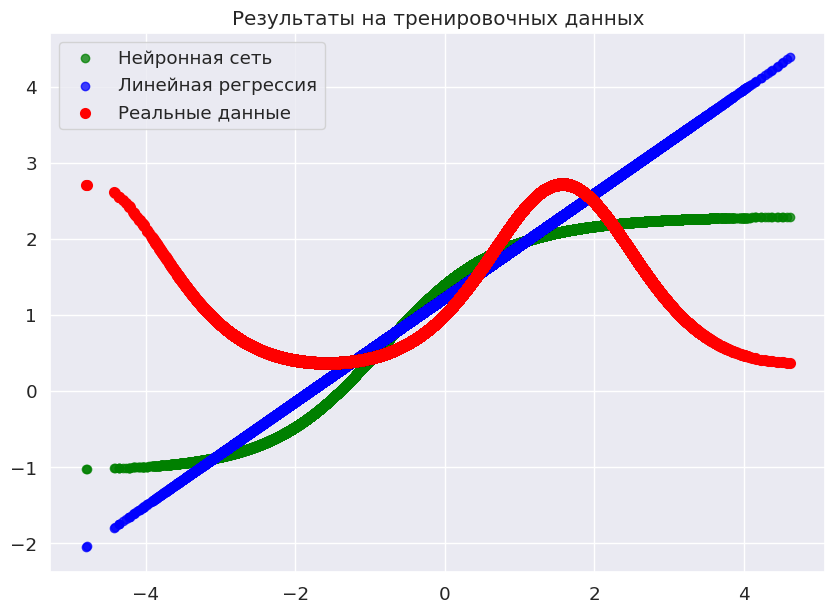

In [67]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_nn_train, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_train, y_lr_train,  color='blue', alpha=0.75, label="Линейная регрессия")
plt.scatter(X_train, y_train, color='red', linewidth=2, label="Реальные данные")
plt.legend()
plt.title('Результаты на тренировочных данных');

Визуализация тестовы данных

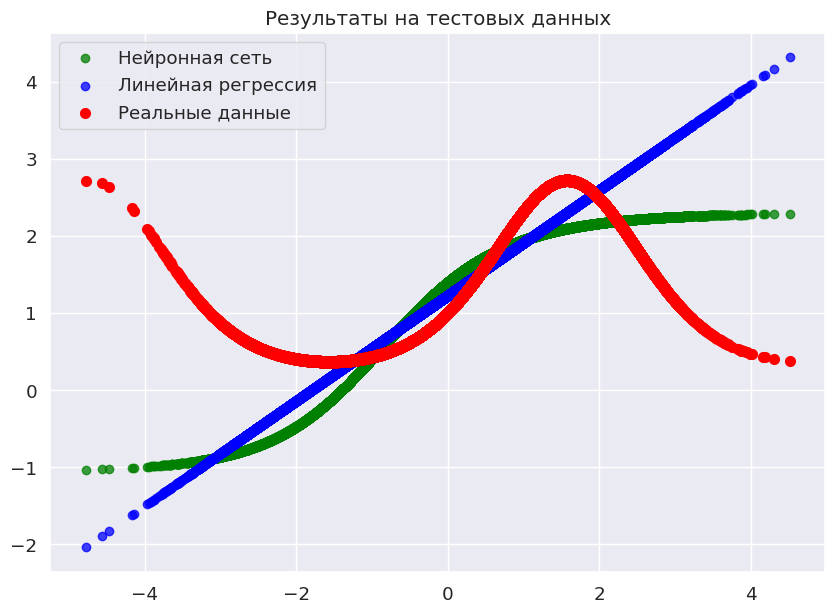

In [68]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_nn_pred, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_test, y_lr_pred,  color='blue', alpha=0.75, label="Линейная регрессия")
plt.scatter(X_test, y_test, color='red', linewidth=2, label="Реальные данные")
plt.legend()
plt.title('Результаты на тестовых данных');

### Вывод

Исходя из проведенных экспериментов можно сделать несколько выводов.

1) Так как исходные данные распределены нормально, оптимизируя функцию потерь одинаково для всех точек, модель старается быть более точной около нуля и практически не обращает внимание на края.
2) Из-за малого числа обучаемых параметров модель не может предсказывать точно сильно нелинейные функции.
3) При равномерном распределении оказывается, что модель плохо предсказывает быстрый рост, например экспоненциальный. Это связано с тем, что сигмоида как функция активации не позволяет значению модели расти при росте икса (так как она ограничена единицей).
4) Но даже модель на двух нейронах по точности превосходит линейную регрессию (поскольку она состоит по факту из нескольких таких линейных регрессий).

---
### Задача 3.

Теперь напишите рассмотренную ранее нейронную сеть с помощью библиотеки `pytorch`, используя Sequential-стиль. Перед выполнением задачи рекомендуется посмотреть <a href="https://miptstats.github.io/courses/ad_fivt/nn_simple_examples.html#3.-Готовые-модули-из-PyTorch" target="_blank">ноутбук</a> с занятия. Функция активации реализована как `torch.nn.Sigmoid`.

*Внимание.* Для выполнения задачи потребуется установить библиотеку `pytorch`. Альтернативный вариант &mdash; выполнение в <a href="https://colab.research.google.com" target="_blank">Google Colab</a>. Учитывайте, что при длительном бездействии Colab может сам завершить работу ядра.

In [69]:
import torch
from torch import nn
import torch.nn.functional as F

Модель

In [70]:
model_torch_nn = nn.Sequential(
    nn.Linear(in_features=1, out_features=2, bias=True),
    nn.Sigmoid(),
    nn.Linear(in_features=2, out_features=1, bias=True),
)
print(model_torch_nn)

Sequential(
  (0): Linear(in_features=1, out_features=2, bias=True)
  (1): Sigmoid()
  (2): Linear(in_features=2, out_features=1, bias=True)
)


Обучите нейросеть на рассмотренных ранее данных. Используйте код с занятия.

Генерация исходных данных

In [71]:
f = lambda x : np.e ** (x / 2)

sample_size = int(1e6)
X = sps.norm.rvs(size=(sample_size, 1))
# X = (sps.uniform.rvs(size=(sample_size, 1)) - 0.5) * 10

y = f(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=32)

Функция отимизации

In [72]:
optimizer = torch.optim.SGD(model_torch_nn.parameters(), lr=0.01)
optim_func = nn.MSELoss()

Преобразование данных в торч-тензоры

In [73]:
X_train = torch.FloatTensor(X_train).reshape(-1, 1)
y_train = torch.FloatTensor(y_train).reshape(-1, 1)

X_test = torch.FloatTensor(X_test).reshape(-1, 1)
y_test = torch.FloatTensor(y_test).reshape(-1, 1)

Обучение модели

In [74]:
num_iter = 1000

for i in tqdm(range(num_iter)):

    y_pred = model_torch_nn(X_train)
    loss = optim_func(y_pred, y_train)

    loss.backward()
    optimizer.step()
    optimizer.zero_grad()

100%|██████████| 1000/1000 [00:16<00:00, 62.45it/s]


Предсказания модели

In [75]:
y_torch_train = model_torch_nn(X_train).detach()
y_torch_test = model_torch_nn(X_test).detach()

Визуализация тренировочных данных

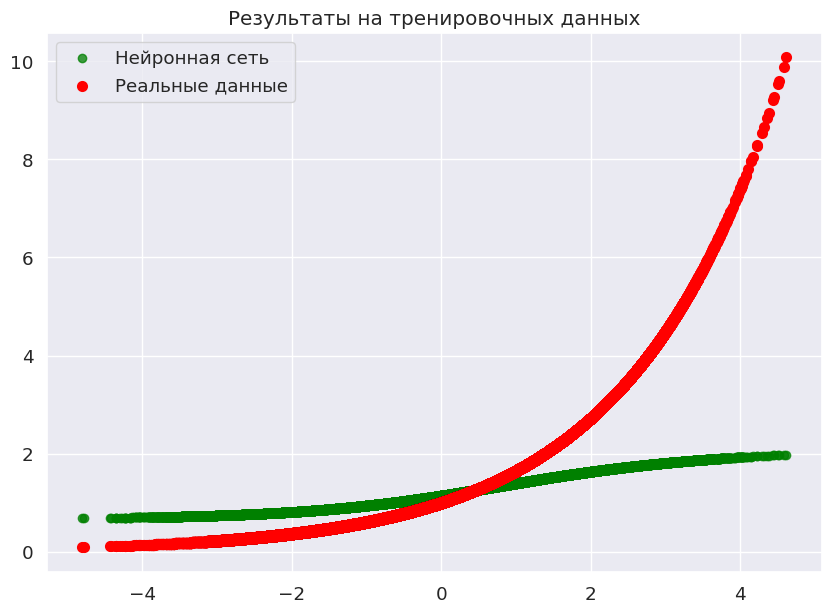

In [76]:
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_torch_train, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_train, y_train, color='red', linewidth=2, label="Реальные данные")
plt.legend()
plt.title('Результаты на тренировочных данных');

Визуализация тестовых данных

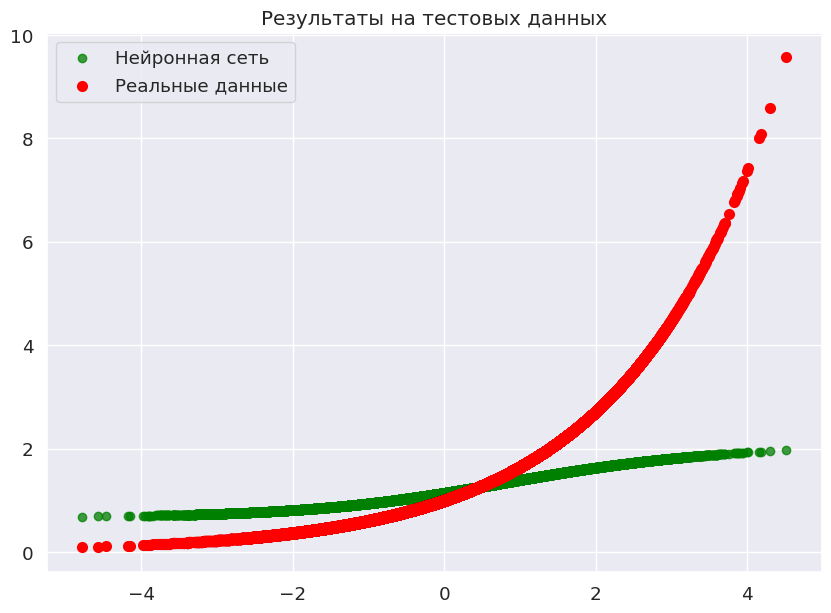

In [77]:
plt.figure(figsize=(10, 7))
plt.scatter(X_test, y_torch_test, color='green', alpha=0.75, label="Нейронная сеть")
plt.scatter(X_test, y_test, color='red', linewidth=2, label="Реальные данные")
plt.legend()
plt.title('Результаты на тестовых данных');

#### Вывод
1) Pytorch --- удобно!
2) Все предыдущие комментарии применимы и тут.
3) Также стоит добавить, что как раз здесь наблюдается то, что функция активации --- сигмоида, а выход модели --- сумма двух сигмоид.